In [54]:
import pandas as pd

data = pd.read_csv(r'C:\Users\kimye\OneDrive\바탕 화면\sba\lending_club_loan_two (1).csv')
data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
396025,10000.0,60 months,10.99,217.38,B,B4,licensed bankere,2 years,RENT,40000.0,...,6.0,0.0,1990.0,34.3,23.0,w,INDIVIDUAL,0.0,0.0,"12951 Williams Crossing\r\nJohnnyville, DC 30723"
396026,21000.0,36 months,12.29,700.42,C,C1,Agent,5 years,MORTGAGE,110000.0,...,6.0,0.0,43263.0,95.7,8.0,f,INDIVIDUAL,1.0,0.0,"0114 Fowler Field Suite 028\r\nRachelborough, ..."
396027,5000.0,36 months,9.99,161.32,B,B1,City Carrier,10+ years,RENT,56500.0,...,15.0,0.0,32704.0,66.9,23.0,f,INDIVIDUAL,0.0,0.0,"953 Matthew Points Suite 414\r\nReedfort, NY 7..."
396028,21000.0,60 months,15.31,503.02,C,C2,"Gracon Services, Inc",10+ years,MORTGAGE,64000.0,...,9.0,0.0,15704.0,53.8,20.0,f,INDIVIDUAL,5.0,0.0,"7843 Blake Freeway Apt. 229\r\nNew Michael, FL..."


# 결측치 제거

In [55]:
data.dropna(subset=['revol_util'], inplace=True)
data.dropna(subset=['pub_rec_bankruptcies'], inplace=True)

In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 395219 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             395219 non-null  float64
 1   term                  395219 non-null  object 
 2   int_rate              395219 non-null  float64
 3   installment           395219 non-null  float64
 4   grade                 395219 non-null  object 
 5   sub_grade             395219 non-null  object 
 6   emp_title             372338 non-null  object 
 7   emp_length            376929 non-null  object 
 8   home_ownership        395219 non-null  object 
 9   annual_inc            395219 non-null  float64
 10  verification_status   395219 non-null  object 
 11  issue_d               395219 non-null  object 
 12  loan_status           395219 non-null  object 
 13  purpose               395219 non-null  object 
 14  title                 393464 non-null  object 
 15  dti  

# 이상치 제거 → 최종 데이터 개수: 393,981개

## dti (LC 제외, 총 부채 상환 비율) → 11개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x2bca650f350>,
 'caps': [<matplotlib.lines.Line2D at 0x2bca648cf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bcd81a4810>],
 'medians': [<matplotlib.lines.Line2D at 0x2bcee82bad0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bcee83c210>],
 'means': []}

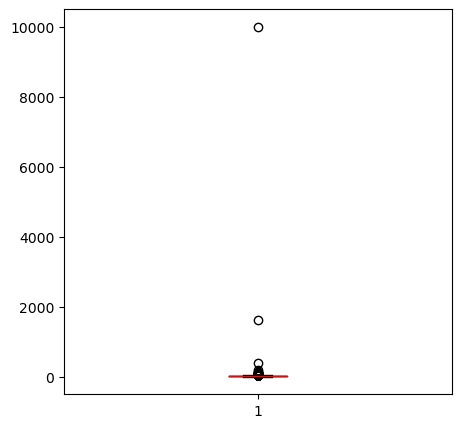

In [57]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':1, 'color':'r'}
ax.boxplot(data['dti'], medianprops=medianprops)

In [58]:
Q1 = data['dti'].quantile(q=0.25)
Q3 = data['dti'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['dti']>upper) | (data['dti']<lower)]))

outliers = data.loc[(data['dti']>upper) | (data['dti']<lower), 'dti'].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  11


## open_acc (활성화 되어 있는 대출 계좌) → 88개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x2bcee8889d0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bcee889d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bca68a1190>],
 'medians': [<matplotlib.lines.Line2D at 0x2bcee88aed0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bcee88b6d0>],
 'means': []}

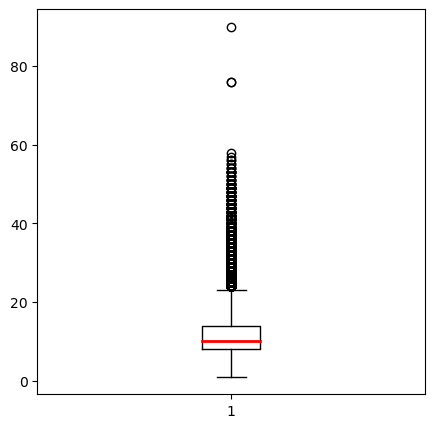

In [59]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['open_acc'], medianprops=medianprops)

In [60]:
Q1 = data['open_acc'].quantile(q=0.25)
Q3 = data['open_acc'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (5*IQR)
lower = Q1 - (5*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['open_acc']>upper) | (data['open_acc']<lower)].index

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  88


## pub_rec (묶여있는 계좌 수) → 2개 제거

Text(0.5, 1.0, 'Before Outlier Removal')

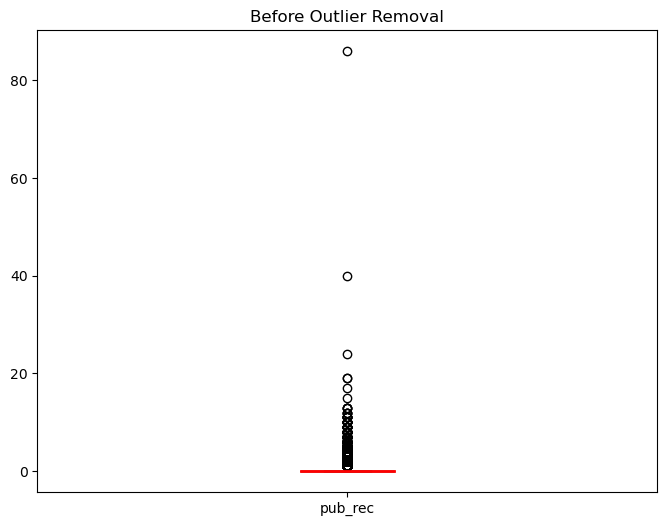

In [61]:
import matplotlib.pyplot as plt

# plt.style.use('seaborn')

fig, ax = plt.subplots(figsize=(8, 6))

medianprops = {'linewidth':2, 'color':'r'}
label = ['pub_rec']
ax.boxplot(data['pub_rec'], medianprops=medianprops, labels=label)
ax.set_title('Before Outlier Removal')

In [62]:
Q1 = data['pub_rec'].quantile(q=0.25)
Q3 = data['pub_rec'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 1.5*IQR
lower = Q1 - 1.5*IQR

#이상치 값 정의
outliers = data.loc[(data['pub_rec']>upper) | (data['pub_rec']<lower)]

print('극단 이상치 개수: ', len(outliers))

#open_acc 열 값에 대한 내림차순 정렬 후 상위 2개 선택
top_outliers = outliers.sort_values(by='pub_rec', ascending=False).head(2)
top_outliers['pub_rec']

#해당 이상치를 가지고 있는 행만 삭제
data = data.drop(top_outliers.index)

극단 이상치 개수:  57724


## revol_bal (revolving 한도) → 1,136개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc865abbd0>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc865bcb10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc865a95d0>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc865be4d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc86574690>],
 'means': []}

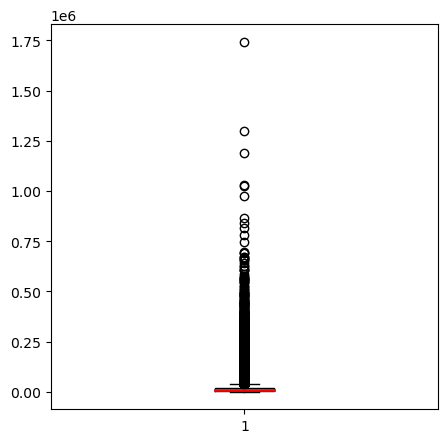

In [63]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_bal'], medianprops=medianprops)

In [64]:
Q1 = data['revol_bal'].quantile(q=0.25)
Q3 = data['revol_bal'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + (10*IQR)
lower = Q1 - (10*IQR)

print('극단 이상치 개수: ', len(data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_bal']>upper) | (data['revol_bal']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1136


## revol_util (revolving 한도 내에서 사용한 비율) → 1개 제거

{'whiskers': [<matplotlib.lines.Line2D at 0x2bc86621a10>,
 'caps': [<matplotlib.lines.Line2D at 0x2bc86622d50>,
 'boxes': [<matplotlib.lines.Line2D at 0x2bc865fce90>],
 'medians': [<matplotlib.lines.Line2D at 0x2bc8662c2d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x2bc8662cd90>],
 'means': []}

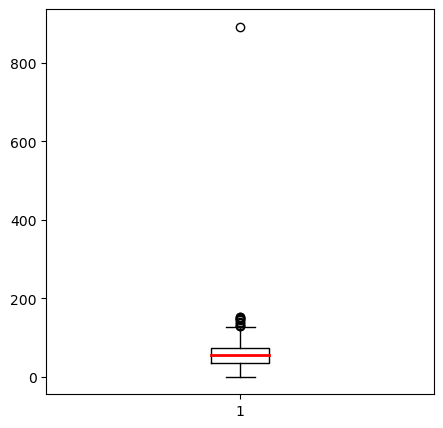

In [65]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(5, 5))

medianprops = {'linewidth':2, 'color':'r'}
ax.boxplot(data['revol_util'], medianprops=medianprops)

In [66]:
Q1 = data['revol_util'].quantile(q=0.25)
Q3 = data['revol_util'].quantile(q=0.75)

IQR = Q3 - Q1

upper = Q3 + 3*IQR
lower = Q1 - 3*IQR

print('극단 이상치 개수: ', len(data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)]))

#이상치 값 정의
outliers = data.loc[(data['revol_util']>upper) | (data['revol_util']<lower)].index

data = data.drop(outliers).reset_index(drop=True)

극단 이상치 개수:  1


In [67]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 393981 entries, 0 to 393980
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             393981 non-null  float64
 1   term                  393981 non-null  object 
 2   int_rate              393981 non-null  float64
 3   installment           393981 non-null  float64
 4   grade                 393981 non-null  object 
 5   sub_grade             393981 non-null  object 
 6   emp_title             371166 non-null  object 
 7   emp_length            375737 non-null  object 
 8   home_ownership        393981 non-null  object 
 9   annual_inc            393981 non-null  float64
 10  verification_status   393981 non-null  object 
 11  issue_d               393981 non-null  object 
 12  loan_status           393981 non-null  object 
 13  purpose               393981 non-null  object 
 14  title                 392238 non-null  object 
 15  

# 명목형 변수 인코딩
- terms(기간), sub_grade(세부 등급), home_ownership(주택 소유 상태), verification_status(대출자의 소득 검증 상태), loan_status(대출 현황_target), application_type(공동 대출 or 개인 대출 or 원천징수), address_code(Zipcode를 통해 추출한 지역 숫자)

## terms (기간)

In [68]:
data['term'] = data['term'].apply(lambda x: int(x.split()[0]) if pd.notnull(x) else x)

# 결과 출력
print(data)

        loan_amnt  term  int_rate  installment grade sub_grade  \
0         10000.0    36     11.44       329.48     B        B4   
1          8000.0    36     11.99       265.68     B        B5   
2         15600.0    36     10.49       506.97     B        B3   
3          7200.0    36      6.49       220.65     A        A2   
4         24375.0    60     17.27       609.33     C        C5   
...           ...   ...       ...          ...   ...       ...   
393976    10000.0    60     10.99       217.38     B        B4   
393977    21000.0    36     12.29       700.42     C        C1   
393978     5000.0    36      9.99       161.32     B        B1   
393979    21000.0    60     15.31       503.02     C        C2   
393980     2000.0    36     13.61        67.98     C        C2   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Marketing  10+ years           RENT    117000.0  ...   
1                Credit analyst     4 years      

## sub_grade (세부 등급)

In [69]:
grades = ['A1', 'A2', 'A3', 'A4', 'A5', 'B1', 'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3', 'D4', 'D5',
          'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5', 'G1', 'G2', 'G3', 'G4', 'G5']

# 각 등급에 부여할 값 생성
values = [34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 
          16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]

# 등급과 값의 매핑을 딕셔너리로 생성
grade_to_value = dict(zip(grades, values))

# '등급' 컬럼을 매핑하여 새로운 '값' 컬럼 생성
data['sub_grade'] = data['sub_grade'].map(grade_to_value)

# 결과 출력
print(data)

        loan_amnt  term  int_rate  installment grade  sub_grade  \
0         10000.0    36     11.44       329.48     B         26   
1          8000.0    36     11.99       265.68     B         25   
2         15600.0    36     10.49       506.97     B         27   
3          7200.0    36      6.49       220.65     A         33   
4         24375.0    60     17.27       609.33     C         20   
...           ...   ...       ...          ...   ...        ...   
393976    10000.0    60     10.99       217.38     B         26   
393977    21000.0    36     12.29       700.42     C         24   
393978     5000.0    36      9.99       161.32     B         29   
393979    21000.0    60     15.31       503.02     C         23   
393980     2000.0    36     13.61        67.98     C         23   

                       emp_title emp_length home_ownership  annual_inc  ...  \
0                      Marketing  10+ years           RENT    117000.0  ...   
1                Credit analyst     4

## home_ownership(주택 소유 상태: 자가, 임대 등)
- 주택을 보유하고 있는 경우에만 가중치 부여

In [70]:
from sklearn.preprocessing import LabelEncoder

data['home_ownership'].unique()

label_mapping = {'OWN':1, 'RENT':0, 'MORTGAGE':0, 'OTHER':0, 'ANY':0, 'NONE':0}
data['home_ownership'] = data['home_ownership'].map(label_mapping)
print(data['home_ownership'])

0         0
1         0
2         0
3         0
4         0
         ..
393976    0
393977    0
393978    0
393979    0
393980    0
Name: home_ownership, Length: 393981, dtype: int64


## verification_status(대출자의 소득 검증 상태)
- 'Not Verified': 0 / 'Source Verified': 1 / 'Verified’: 2

In [71]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(data['verification_status'])
data['verification_status'] = encoder.transform(data['verification_status'])

## loan_status(대출 현황: 완납, 체납)
- Fully paid: 1
- Charged Off: 0

In [72]:
loan_status_mapping = {'Fully Paid':1, 'Charged Off':0}
data['loan_status'] = data['loan_status'].map(loan_status_mapping)

## address(차용인 주소)
- get dummies

### Zipcode 생성

In [73]:
import re

# 우편번호 추출 함수 정의
def extract_zipcode(address):
    zipcode = re.search(r'\b\d{5}\b', address).group()
    return zipcode

# 데이터프레임에 적용하여 우편번호 추출
data['Zipcode'] = data['address'].apply(extract_zipcode)

print(data['Zipcode'])

0         22690
1         05113
2         87025
3         00813
4         11650
          ...  
393976    12951
393977    05113
393978    70466
393979    29597
393980    48052
Name: Zipcode, Length: 393981, dtype: object


### Zipcode에서 첫 번째 숫자를 추출해낸 address_code 생성

In [74]:
data['address_code'] = data['Zipcode'].str[0]

In [75]:
summary1 = data[data['address_code'] == '1']['annual_inc'].describe().loc['25%']
summary8 = data[data['address_code'] == '8']['annual_inc'].describe().loc['25%']
summary9 = data[data['address_code'] == '9']['annual_inc'].describe().loc['25%']
print(summary1)
print(summary8)
print(summary9)
print((summary1 + summary8 + summary9) / 3)

44451.0
44500.0
44000.0
44317.0


### address_code → get_dummies(인코딩 과정)

In [76]:
# 'address_code' 열의 값을 더미 변수로 변환하고 컬럼 이름에 'address'를 prefix로 붙임
dummy_address = pd.get_dummies(data['address_code'], prefix='address', dtype=int)

print(dummy_address)

        address_0  address_1  address_2  address_3  address_4  address_5  \
0               0          0          1          0          0          0   
1               1          0          0          0          0          0   
2               0          0          0          0          0          0   
3               1          0          0          0          0          0   
4               0          1          0          0          0          0   
...           ...        ...        ...        ...        ...        ...   
393976          0          1          0          0          0          0   
393977          1          0          0          0          0          0   
393978          0          0          0          0          0          0   
393979          0          0          1          0          0          0   
393980          0          0          0          0          1          0   

        address_6  address_7  address_8  address_9  
0               0          0      

In [77]:
combined_data = pd.concat([data, dummy_address], axis=1)
combined_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,address_0,address_1,address_2,address_3,address_4,address_5,address_6,address_7,address_8,address_9
0,10000.0,36,11.44,329.48,B,26,Marketing,10+ years,0,117000.0,...,0,0,1,0,0,0,0,0,0,0
1,8000.0,36,11.99,265.68,B,25,Credit analyst,4 years,0,65000.0,...,1,0,0,0,0,0,0,0,0,0
2,15600.0,36,10.49,506.97,B,27,Statistician,< 1 year,0,43057.0,...,0,0,0,0,0,0,0,0,1,0
3,7200.0,36,6.49,220.65,A,33,Client Advocate,6 years,0,54000.0,...,1,0,0,0,0,0,0,0,0,0
4,24375.0,60,17.27,609.33,C,20,Destiny Management Inc.,9 years,0,55000.0,...,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,26,licensed bankere,2 years,0,40000.0,...,0,1,0,0,0,0,0,0,0,0
393977,21000.0,36,12.29,700.42,C,24,Agent,5 years,0,110000.0,...,1,0,0,0,0,0,0,0,0,0
393978,5000.0,36,9.99,161.32,B,29,City Carrier,10+ years,0,56500.0,...,0,0,0,0,0,0,0,1,0,0
393979,21000.0,60,15.31,503.02,C,23,"Gracon Services, Inc",10+ years,0,64000.0,...,0,0,1,0,0,0,0,0,0,0


## application_type(공동 대출 or 개인 대출 or 원천징수)
- get dummies

In [78]:
dummy_app_type = pd.get_dummies(data['application_type'], prefix='app_type', dtype=int)
dummy_app_type

,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
0,0,1,0
1,0,1,0
2,0,1,0
3,0,1,0
4,0,1,0
...,...,...,...
393976,0,1,0
393977,0,1,0
393978,0,1,0
393979,0,1,0


In [79]:
fn_combined_data = pd.concat([combined_data, dummy_app_type], axis=1)
fn_combined_data

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,address_3,address_4,address_5,address_6,address_7,address_8,address_9,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
0,10000.0,36,11.44,329.48,B,26,Marketing,10+ years,0,117000.0,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,B,25,Credit analyst,4 years,0,65000.0,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,B,27,Statistician,< 1 year,0,43057.0,...,0,0,0,0,0,1,0,0,1,0
3,7200.0,36,6.49,220.65,A,33,Client Advocate,6 years,0,54000.0,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,C,20,Destiny Management Inc.,9 years,0,55000.0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,B,26,licensed bankere,2 years,0,40000.0,...,0,0,0,0,0,0,0,0,1,0
393977,21000.0,36,12.29,700.42,C,24,Agent,5 years,0,110000.0,...,0,0,0,0,0,0,0,0,1,0
393978,5000.0,36,9.99,161.32,B,29,City Carrier,10+ years,0,56500.0,...,0,0,0,0,1,0,0,0,1,0
393979,21000.0,60,15.31,503.02,C,23,"Gracon Services, Inc",10+ years,0,64000.0,...,0,0,0,0,0,0,0,0,1,0


# 불필요한 컬럼 제거(42개 → 29개)

In [80]:
COL_DEL = ['grade', 'emp_title', 'emp_length', 'issue_d', 'purpose', 'title', 'earliest_cr_line', 'initial_list_status', 'application_type', 'address', 'Zipcode', 'mort_acc', 'address_code']

In [81]:
#1. grade
fn_combined_data.drop('grade', axis=1, inplace=True)

#2. emp_title
fn_combined_data.drop('emp_title', axis=1, inplace=True)

#3. emp_length
fn_combined_data.drop('emp_length', axis=1, inplace=True)

#4. issue_d(날짜 데이터 사용 X로 칼럼 삭제)
fn_combined_data.drop('issue_d', axis=1, inplace=True)

#5. purpose
fn_combined_data.drop('purpose', axis=1, inplace=True)

#6. title
fn_combined_data.drop('title', axis=1, inplace=True)

#7. earliest_cr_line
fn_combined_data.drop('earliest_cr_line', axis=1, inplace=True)

#8. initial_list_status
fn_combined_data.drop('initial_list_status', axis=1, inplace=True)

#9. application_type
fn_combined_data.drop('application_type', axis=1, inplace=True)

#10. address
fn_combined_data.drop('address', axis=1, inplace=True)

#11. Zipcode
fn_combined_data.drop('Zipcode', axis=1, inplace=True)

#12. mort_acc
fn_combined_data.drop('mort_acc', axis=1, inplace=True)

In [82]:
#13. mort_acc
fn_combined_data.drop('address_code', axis=1, inplace=True)

In [83]:
fn_combined_data

,loan_amnt,term,int_rate,installment,sub_grade,home_ownership,annual_inc,verification_status,loan_status,dti,...,address_3,address_4,address_5,address_6,address_7,address_8,address_9,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
0,10000.0,36,11.44,329.48,26,0,117000.0,0,1,26.24,...,0,0,0,0,0,0,0,0,1,0
1,8000.0,36,11.99,265.68,25,0,65000.0,0,1,22.05,...,0,0,0,0,0,0,0,0,1,0
2,15600.0,36,10.49,506.97,27,0,43057.0,1,1,12.79,...,0,0,0,0,0,1,0,0,1,0
3,7200.0,36,6.49,220.65,33,0,54000.0,0,1,2.60,...,0,0,0,0,0,0,0,0,1,0
4,24375.0,60,17.27,609.33,20,0,55000.0,2,0,33.95,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
393976,10000.0,60,10.99,217.38,26,0,40000.0,1,1,15.63,...,0,0,0,0,0,0,0,0,1,0
393977,21000.0,36,12.29,700.42,24,0,110000.0,1,1,21.45,...,0,0,0,0,0,0,0,0,1,0
393978,5000.0,36,9.99,161.32,29,0,56500.0,2,1,17.56,...,0,0,0,0,1,0,0,0,1,0
393979,21000.0,60,15.31,503.02,23,0,64000.0,2,1,15.88,...,0,0,0,0,0,0,0,0,1,0


In [84]:
fn_combined_data.to_csv('preprocessed_data.csv', index=False)

# Oversampling

In [85]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample


# 클래스 별로 샘플 수 계산

#0 = 체납 
minority_class = fn_combined_data[fn_combined_data['loan_status'] == 0]
#1 = 완납
majority_class = fn_combined_data[fn_combined_data['loan_status'] == 1]

print("Minority class samples:", len(minority_class))
print("Majority class samples:", len(majority_class))

# 적절한 비율로 오버샘플링 수행
minority_class_oversampled = resample(minority_class,
                                      replace=True,
                                      n_samples=len(majority_class),
                                      random_state=42)

# 오버샘플링된 데이터를 기존 데이터와 합치기
data_oversampled = pd.concat([majority_class, minority_class_oversampled])

print(data_oversampled.shape)

Minority class samples: 77352
Majority class samples: 316629
(633258, 29)


## Oversampling 시각화

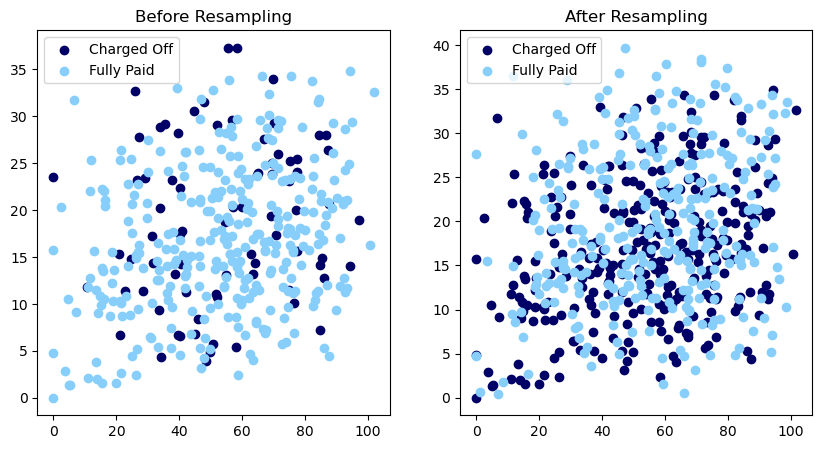

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

X1 = minority_class['revol_util'][:int(len(minority_class)*0.001)]
X2 = minority_class['dti'][:int(len(minority_class)*0.001)]

X3 = majority_class['revol_util'][:int(len(majority_class)*0.001)]
X4 = majority_class['dti'][:int(len(majority_class)*0.001)]

major2 = data_oversampled.loc[data_oversampled['loan_status']==0]
minor2 = data_oversampled.loc[data_oversampled['loan_status']==1]

XX1 = minor2['revol_util'][:int(len(minor2)*0.001)]
XX2 = minor2['dti'][:int(len(minor2)*0.001)]

XX3 = major2['revol_util'][:int(len(major2)*0.001)]
XX4 = major2['dti'][:int(len(major2)*0.001)]

# print(len(X1), len(X2), len(X3), len(X4))
# print(len(XX1), len(XX2), len(XX3), len(XX4))

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].scatter(X1, X2, label='Charged Off', c='#000066') #체납
axes[0].scatter(X3, X4, label='Fully Paid', c='#87CEFA') #완납

axes[1].scatter(XX1, XX2, label='Charged Off', c='#000066') #체납
axes[1].scatter(XX3, XX4, label='Fully Paid', c='#87CEFA') #완납

axes[0].set_title('Before Resampling')
axes[0].legend()
axes[1].set_title('After Resampling')
axes[1].legend()

In [87]:
#0 = 체납 
minority_class = data_oversampled[data_oversampled['loan_status'] == 0]
#1 = 완납
majority_class = data_oversampled[data_oversampled['loan_status'] == 1]

print("Minority class samples:", len(minority_class))
print("Majority class samples:", len(majority_class))

Minority class samples: 316629
Majority class samples: 316629


# 수치형 변수 스케일링

## 데이터 분리

In [88]:
COL_NUM = ['loan_amnt', 'int_rate', 'installment', 'annual_inc', 'dti', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'pub_rec_bankruptcies']
COL_CAT = ['term', 'sub_grade', 'home_ownership', 'verification_status', 'address_0', 'address_1', 'address_2', 'address_3', 'address_4', 'address_5',
           'address_6', 'address_7', 'address_8', 'address_9', 'app_type_DIRECT_PAY', 'app_type_INDIVIDUAL', 'app_type_JOINT']

In [89]:
test = data_oversampled.drop('loan_status', axis=1)
size = int(len(test) * 0.8)

X_train = test.iloc[:size]
X_test = test.iloc[size:]

y_train = data_oversampled['loan_status'].iloc[:size]
y_test = data_oversampled['loan_status'].iloc[size:]

## 수치형 변수 스케일링

In [90]:
from sklearn.model_selection import train_test_split
X_tr, X_val, y_tr, y_val = train_test_split(X_train[COL_NUM+COL_CAT],
							                         y_train.values.ravel(),
								                       test_size=0.3,
							                         stratify=y_train.values.ravel())

In [91]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_tr[COL_NUM])

X_tr[COL_NUM] = scaler.transform(X_tr[COL_NUM])
X_val[COL_NUM] = scaler.transform(X_val[COL_NUM])
X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])

C:\Users\kimye\AppData\Local\Temp\ipykernel_28248\1433769287.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[COL_NUM] = scaler.transform(X_test[COL_NUM])


In [92]:
X_tr.head()

,loan_amnt,int_rate,installment,annual_inc,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,...,address_3,address_4,address_5,address_6,address_7,address_8,address_9,app_type_DIRECT_PAY,app_type_INDIVIDUAL,app_type_JOINT
118967,0.203439,0.256834,-0.208206,-0.393660,0.397916,0.125450,-0.353857,-0.088766,-0.725289,-0.446245,...,0,0,0,0,0,0,0,0,1,0
213851,-0.154870,-0.226789,0.013910,-0.587809,-0.970462,0.125450,-0.353857,-0.361254,-0.177346,-0.699520,...,0,0,0,1,0,0,0,0,1,0
391828,0.257186,-1.372097,0.318273,0.594734,-1.933665,-0.459303,-0.353857,-0.783862,-1.087838,0.904556,...,0,0,0,0,1,0,0,0,1,0
294543,-0.274307,0.903130,0.000375,0.171136,-0.339649,0.125450,1.574151,-0.421026,-0.004312,0.060305,...,0,1,0,0,0,0,0,0,1,0
364954,-1.349236,-0.543343,-1.345693,-0.598399,-0.361485,-0.459303,1.574151,-0.768230,-0.313302,-1.037220,...,1,0,0,0,0,0,0,0,1,0


In [93]:
y_tr

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

# 모델링

## XGBoost

In [94]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [95]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

modelXGB = XGBClassifier()
modelXGB.fit(X_tr, y_tr)

#예측 데이터 정의하기
y_val_pred = modelXGB.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

Confusion Matrix:
 [[34525 22468]
 [14058 80931]]
--------------------------------------------------
Accuracy: 0.7596689081601768
Recall: 0.7288900320954634


## Random Forest

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

modelRF = RandomForestClassifier(random_state=123)
modelRF.fit(X_tr, y_tr)

y_val_pred = modelRF.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)


Confusion Matrix:
 [[51094  5899]
 [ 7669 87320]]
--------------------------------------------------
Accuracy: 0.9107262702162098
Recall: 0.9078801983951157


## Logistic Regressor

In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

model = LogisticRegression(random_state=123)
model.fit(X_tr, y_tr)

y_val_pred = model.predict(X_val)

# 성능 평가
# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

#정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

Confusion Matrix:
 [[31971 25022]
 [14032 80957]]
--------------------------------------------------
Accuracy: 0.7430353594504613
Recall: 0.7066206296294908


c:\Users\kimye\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Naive Bayes

In [98]:
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score

# BernoulliNB 모델 생성
model_BernoulliNB = BernoulliNB()

# 학습 데이터에 모델 훈련
model_BernoulliNB.fit(X_tr, y_tr)

# 검증 데이터 예측
y_val_pred = model_BernoulliNB.predict(X_val)

# 혼동 행렬 계산
confusion = confusion_matrix(y_val, y_val_pred)
print('Confusion Matrix:\n', confusion)
print('-'*50)

# 정확도 계산
accuracy = accuracy_score(y_val, y_val_pred)
print('Accuracy:', accuracy)

# 재현율 계산
recall = recall_score(y_val, y_val_pred, average='macro')
print('Recall:', recall)

Confusion Matrix:
 [[33313 23680]
 [17208 77781]]
--------------------------------------------------
Accuracy: 0.7309681409640615
Recall: 0.7016762800969181
